<h2>Earnings and Budget Description of Movie Dataset</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot

pd.options.display.float_format = '${:,.2f}'.format

movie_data = pd.read_csv('cost_revenue_dirty.csv')

def make_numeric(column_title):
  column = movie_data[column_title]
  column = column.str.replace('$','').replace(',','', regex=True)
  column = pd.to_numeric(column)

  return column


def date_column():
  dates = pd.to_datetime(movie_data['Release_Date'])
  movie_data['Release_Date'] = dates

columns_to_change = movie_data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']]

date_column()

for column in columns_to_change:
  movie_data[column] = make_numeric(column)
  movie_data[column] = movie_data[column].astype(float)

#Removing Rows With Missing Data
stop_date = pd.Timestamp('2017-12-31')
bad_data = movie_data[movie_data.Release_Date >= stop_date]
drop_indexes = list(bad_data.index)
movie_data = movie_data.drop(index=drop_indexes)

description_data = movie_data.drop(columns=['Rank', 'Release_Date'])
description_data.describe()

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"$5,383.00","$5,383.00","$5,383.00"
mean,"$31,040,527.45","$88,987,475.35","$41,296,802.03"
std,"$40,443,518.32","$168,548,048.71","$66,059,246.13"
min,"$1,100.00",$0.00,$0.00
25%,"$5,000,000.00","$3,965,683.50","$1,355,403.50"
50%,"$17,000,000.00","$27,572,844.00","$17,223,265.00"
75%,"$40,000,000.00","$96,650,159.50","$52,409,671.00"
max,"$425,000,000.00","$2,783,918,982.00","$936,662,225.00"


<h2>Bottom 25% Film Budget Profitability</h2>
<p>According to the data above, the bottom 25% of production spending was $5 million.</p>

Text(Films That Declined, 674, '674')

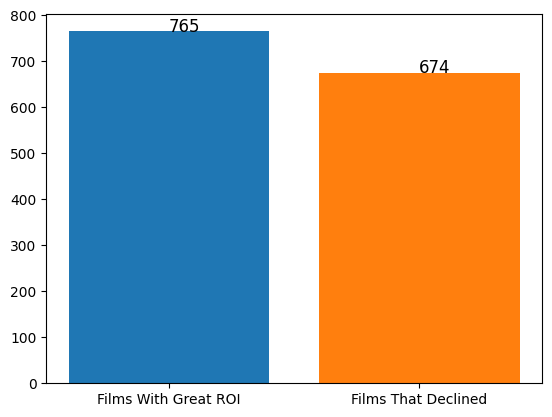

In [ ]:
from matplotlib.pyplot import bar, text

q1 = movie_data[movie_data.USD_Production_Budget <= 5000000]
total_earnings = q1['USD_Domestic_Gross'] + q1['USD_Worldwide_Gross']
q1 = q1.drop(columns='Rank')
q1.insert(5, 'USD_Total_Earnings', total_earnings)

q1_num = q1['Movie_Title'].count()
q1_growth = q1[q1.USD_Total_Earnings > q1.USD_Production_Budget]
q1g_num = q1_growth['Movie_Title'].count()
q1d_num = q1_num - q1g_num

bar(x='Films With Great ROI', height=q1g_num)
text(s=q1g_num, x='Films With Great ROI', y=q1g_num, fontsize=12)
bar(x='Films That Declined', height=q1d_num)
text(s=q1d_num, x='Films That Declined', y=q1d_num, fontsize=12)


<h2>Top 10 Bottom 25% Budget Films with their Total Earnings</h2>

In [ ]:
q1_growth = q1_growth.sort_values('USD_Total_Earnings', ascending=False)[:10]
q1_growth

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Total_Earnings
1800,2002-04-19,My Big Fat Greek Wedding,"$5,000,000.00","$374,890,034.00","$241,438,208.00","$616,328,242.00"
23,1939-12-15,Gone with the Wind,"$3,900,000.00","$390,525,192.00","$198,680,470.00","$589,205,662.00"
5326,2017-02-24,Get Out,"$5,000,000.00","$251,359,904.00","$175,484,140.00","$426,844,044.00"
5313,2017-01-20,Split,"$5,000,000.00","$276,841,585.00","$138,141,585.00","$414,983,170.00"
1268,1999-07-14,The Blair Witch Project,"$600,000.00","$248,300,000.00","$140,539,099.00","$388,839,099.00"
28,1942-08-13,Bambi,"$858,000.00","$268,000,000.00","$102,797,000.00","$370,797,000.00"
18,1937-12-21,Snow White and the Seven Dwarfs,"$1,488,000.00","$184,925,485.00","$184,925,485.00","$369,850,970.00"
46,1950-02-15,Cinderella,"$2,900,000.00","$263,591,415.00","$85,000,000.00","$348,591,415.00"
214,1976-11-21,Rocky,"$1,000,000.00","$225,000,000.00","$117,235,147.00","$342,235,147.00"
4011,2011-10-21,Paranormal Activity 3,"$5,000,000.00","$202,053,386.00","$104,028,807.00","$306,082,193.00"


<h2>Top 10 Films with Highest Budget and their Total Earnings</h2>

In [ ]:
highest_budget = movie_data.sort_values('USD_Production_Budget', ascending=False)[:10]
total_earnings = highest_budget['USD_Domestic_Gross'] + highest_budget['USD_Worldwide_Gross']
highest_budget = highest_budget.drop(columns='Rank')
highest_budget.insert(5, 'USD_Total_Earnings', total_earnings)
highest_budget

,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Total_Earnings
3529,2009-12-18,Avatar,"$425,000,000.00","$2,783,918,982.00","$760,507,625.00","$3,544,426,607.00"
5079,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000.00","$2,058,662,225.00","$936,662,225.00","$2,995,324,450.00"
4925,2015-06-11,Spectre,"$300,000,000.00","$879,620,923.00","$200,074,175.00","$1,079,695,098.00"
2911,2007-05-24,Pirates of the Caribbean: At World’s End,"$300,000,000.00","$963,420,425.00","$309,420,425.00","$1,272,840,850.00"
4223,2012-09-03,John Carter,"$275,000,000.00","$282,778,100.00","$73,058,679.00","$355,836,779.00"
4333,2013-02-07,The Lone Ranger,"$275,000,000.00","$260,002,115.00","$89,302,115.00","$349,304,230.00"
4196,2012-07-20,The Dark Knight Rises,"$275,000,000.00","$1,084,439,099.00","$448,139,099.00","$1,532,578,198.00"
3777,2010-11-24,Tangled,"$260,000,000.00","$586,581,936.00","$200,821,936.00","$787,403,872.00"
2885,2007-04-05,Spider-Man 3,"$258,000,000.00","$890,875,303.00","$336,530,303.00","$1,227,405,606.00"
5161,2016-03-25,Batman v Superman: Dawn of Justice,"$250,000,000.00","$868,160,194.00","$330,360,194.00","$1,198,520,388.00"


<h2>Top 10 Highest Grossing Films Worldwide</h2>

In [ ]:
highest_ww = movie_data.sort_values('USD_Worldwide_Gross', ascending=False)
highest_ww = highest_ww[['Release_Date', 'Movie_Title', 'USD_Worldwide_Gross']][:10]
highest_ww

,Release_Date,Movie_Title,USD_Worldwide_Gross
3529,2009-12-18,Avatar,"$2,783,918,982.00"
1034,1997-12-19,Titanic,"$2,207,615,668.00"
5079,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$2,058,662,225.00"
5077,2015-12-06,Jurassic World,"$1,671,640,593.00"
4131,2012-04-05,The Avengers,"$1,519,479,547.00"
4844,2015-03-04,Furious 7,"$1,516,748,684.00"
4789,2015-01-05,Avengers: Age of Ultron,"$1,404,705,868.00"
3925,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"$1,341,511,219.00"
4497,2013-11-22,Frozen,"$1,274,234,980.00"
5330,2017-03-17,Beauty and the Beast,"$1,260,122,363.00"


<h2>Number of Films in Dataset with No Revenue or Revenue Data</h2>

In [ ]:
d_zero = movie_data['USD_Domestic_Gross'] == 0
w_zero = movie_data['USD_Worldwide_Gross'] == 0

zeros = movie_data.query('@d_zero and @w_zero')
num_zero_films = zeros['Movie_Title'].count()
num_zero_films

349

<h2>Top 10 Films with International Revenue and No US Revenue</h2>

In [ ]:
nw_zero = movie_data['USD_Worldwide_Gross'] != 0
irevenue_data = movie_data.query('@nw_zero and @d_zero')
irevenue_data = irevenue_data.sort_values('USD_Worldwide_Gross', ascending=False)[:10]
irevenue_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,"$42,000,000.00","$83,833,602.00",$0.00
4960,3283,2015-08-05,La famille Bélier,"$11,000,000.00","$74,056,184.00",$0.00
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,"$25,000,000.00","$71,594,792.00",$0.00
3769,2776,2010-11-05,Haeundae,"$16,000,000.00","$64,733,391.00",$0.00
3051,2665,2007-12-31,Taxi 4,"$17,500,000.00","$60,865,364.00",$0.00
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,"$77,600,000.00","$60,680,125.00",$0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"$23,000,000.00","$58,807,172.00",$0.00
3808,1855,2010-12-31,Konferenz der Tiere,"$30,000,000.00","$53,048,539.00",$0.00
5372,1856,2017-08-25,Ballerina,"$30,000,000.00","$48,048,527.00",$0.00
3724,2777,2010-09-03,Hachiko: A Dog's Story,"$16,000,000.00","$47,707,417.00",$0.00


<h2>Percentage of Movies that Made Money vs. Movies that Didn't</h2>

In [ ]:
import plotly.express as px

declining_movies = movie_data[movie_data.USD_Production_Budget > movie_data.USD_Worldwide_Gross]['Movie_Title'].count()
successful_movies = movie_data[movie_data.USD_Production_Budget < movie_data.USD_Worldwide_Gross]['Movie_Title'].count()
success_df = pd.Series(data=[successful_movies, declining_movies])
success_df.index = ['Successful Movies', 'Unsuccessful Movies']

donut = px.pie(labels=success_df.index,
               values=success_df.values,
               hole=0.6,
               names=success_df.index)

donut.update_traces(textposition='inside',
                    textinfo='percent',
                    textfont_size=15)
donut.show()

<h2>Bubble Chart of Movies with Color Relative to International Earnings</h2>

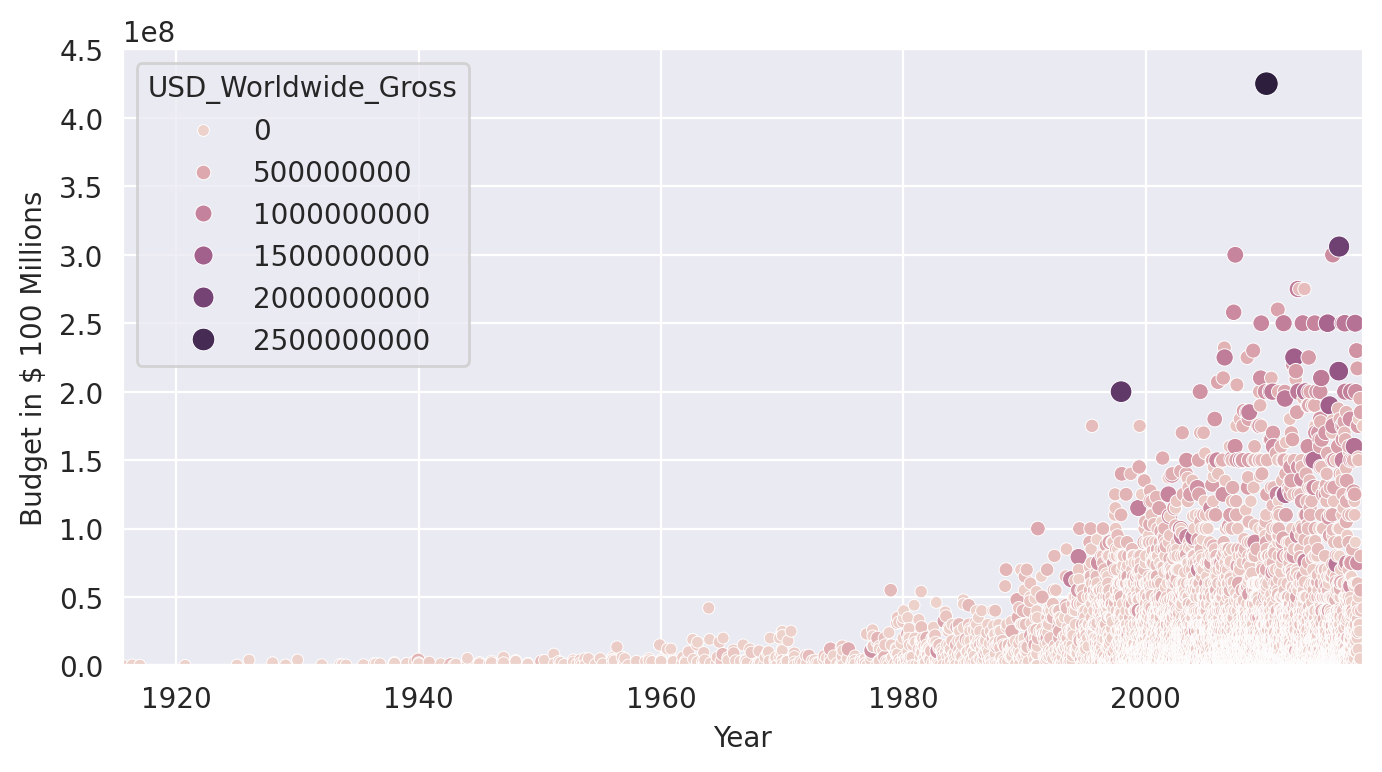

In [ ]:
import seaborn as sb
from matplotlib.pyplot import figure

fig = figure(figsize=(8, 4), dpi=200)


with sb.axes_style('darkgrid'):
  scatter = sb.scatterplot(data=movie_data,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

scatter.set(xlim=(movie_data.Release_Date.min(), movie_data.Release_Date.max()),
            ylim=(0, 450000000),
            ylabel='Budget in $ 100 Millions',
            xlabel='Year')

fig.show()

In [ ]:
year_data = pd.DatetimeIndex(movie_data['Release_Date']).year
decades = year_data // 10 * 10
movie_data.insert(6, 'Decade', decades)
movie_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"$110,000.00","$11,000,000.00","$10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"$385,907.00",$0.00,$0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000.00","$8,000,000.00","$8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000.00","$3,000,000.00","$3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"$245,000.00","$22,000,000.00","$11,000,000.00",1920
...,...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,"$55,000,000.00","$376,856,949.00","$114,434,010.00",2010
5379,1295,2017-10-02,John Wick: Chapter Two,"$40,000,000.00","$166,893,990.00","$92,029,184.00",2010
5380,70,2017-10-03,Kong: Skull Island,"$185,000,000.00","$561,137,727.00","$168,052,812.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"$175,000,000.00","$140,012,608.00","$39,175,066.00",2010


<h2>Number of Films Released Before 1970</h2>

In [ ]:
old_films = movie_data[movie_data.Decade < 1970]
new_films = movie_data[movie_data.Decade >= 1970]
num_old_films = old_films['Movie_Title'].count()
num_old_films

153

<h2>Top 10 Most Expensive Films Before 1970</h2>

In [ ]:
top_old_films = old_films.sort_values('USD_Production_Budget', ascending=False)[:10]
top_old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,"$42,000,000.00","$71,000,000.00","$57,000,000.00",1960
150,2175,1969-12-16,"Hello, Dolly","$24,000,000.00","$33,208,099.00","$33,208,099.00",1960
143,2465,1969-01-01,Sweet Charity,"$20,000,000.00","$8,000,000.00","$8,000,000.00",1960
118,2425,1965-02-15,The Greatest Story Ever Told,"$20,000,000.00","$15,473,333.00","$15,473,333.00",1960
148,2375,1969-10-15,Paint Your Wagon,"$20,000,000.00","$31,678,778.00","$31,678,778.00",1960
110,2552,1964-01-01,The Fall of the Roman Empire,"$19,000,000.00","$4,750,000.00","$4,750,000.00",1960
98,2546,1962-08-11,Mutiny on The Bounty,"$19,000,000.00","$13,680,000.00","$13,680,000.00",1960
114,2670,1964-10-22,My Fair Lady,"$17,000,000.00","$72,070,955.00","$72,000,000.00",1960
102,2698,1963-01-01,55 Days at Peking,"$17,000,000.00","$10,000,000.00","$10,000,000.00",1960
125,2831,1966-10-10,Hawaii,"$15,000,000.00","$34,562,222.00","$34,562,222.00",1960


<h2>Regression Plot of Films Before 1970</h2>

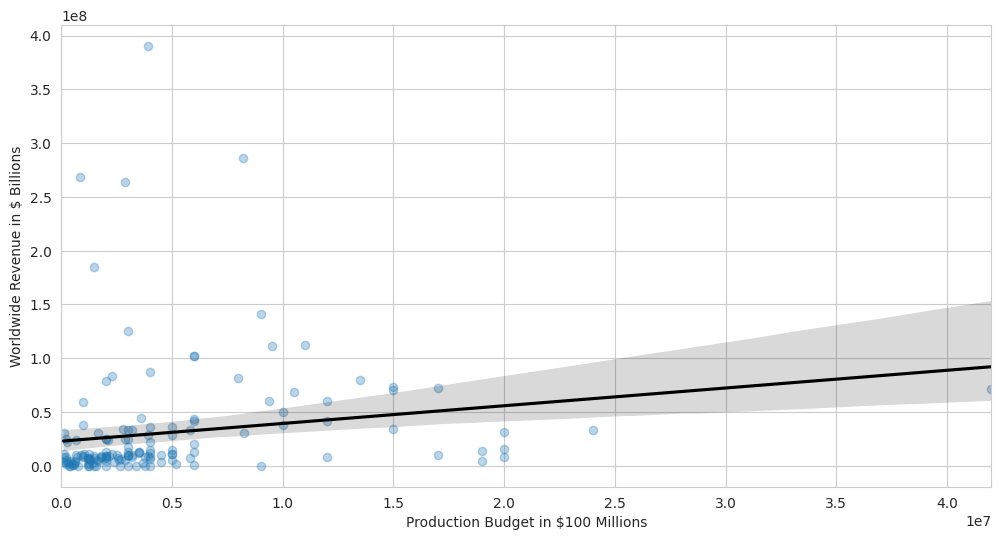

In [ ]:
fig = figure(figsize=(12, 6))

total_earnings = old_films['USD_Domestic_Gross'] + old_films['USD_Worldwide_Gross']
old_films.insert(7, 'Total_Earnings', total_earnings)

with sb.axes_style('whitegrid'):
  old_film_plot = sb.regplot(data=old_films,
                             x='USD_Production_Budget',
                             y='USD_Worldwide_Gross',
                             scatter_kws={'alpha': 0.3},
                             line_kws={'color': 'black'})

  old_film_plot.set(xlabel='Production Budget in $100 Millions',
                    ylabel='Worldwide Revenue in $ Billions',
                    xlim=(0, old_films['USD_Production_Budget'].max()))

  fig.show()

<h2>Regression Plot of Films After 1970</h2>

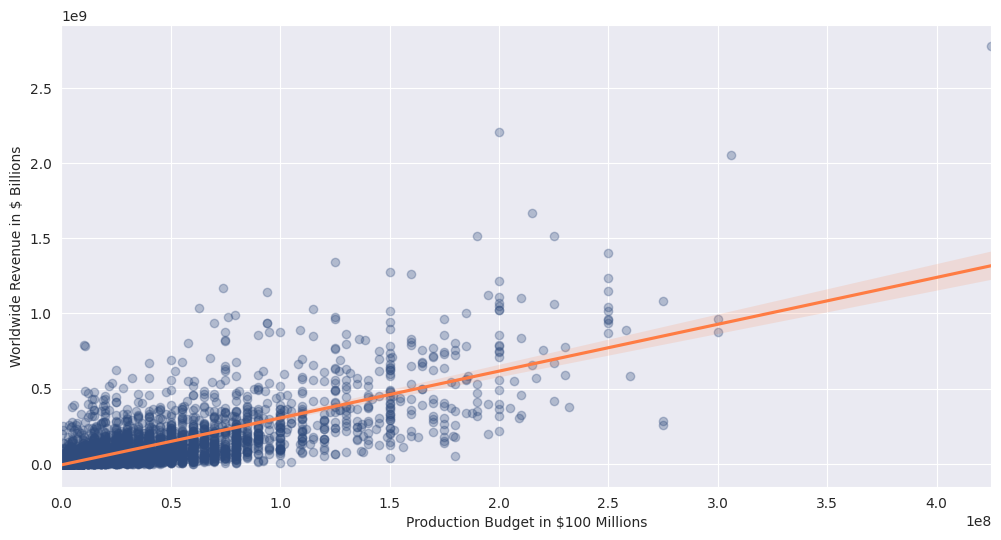

In [ ]:
fig = figure(figsize=(12, 6))

total_earnings = new_films['USD_Domestic_Gross'] + new_films['USD_Worldwide_Gross']
new_films.insert(7, 'Total_Earnings', total_earnings)

with sb.axes_style('darkgrid'):
  new_film_plot = sb.regplot(data=new_films,
                             x='USD_Production_Budget',
                             y='USD_Worldwide_Gross',
                             scatter_kws={'color': '#2f4b7c', 'alpha': 0.3},
                             line_kws={'color':'#ff7c43'})

  new_film_plot.set(xlabel='Production Budget in $100 Millions',
                    ylabel='Worldwide Revenue in $ Billions',
                    xlim=(0, new_films['USD_Production_Budget'].max()))

fig.show()

<h2>Determining Linear Regression of Films Before 1970</h2>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


old_film_x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_film_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression = LinearRegression().fit(old_film_x, old_film_y)
intercept = np.round(regression.intercept_[0], 2)
slope = np.round(regression.coef_[0,0], 2)
r_sqr = regression.score(old_film_x, old_film_y)
r_sqr = np.round(r_sqr, 2)

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R Squared: {r_sqr}")


Intercept: 22821538.64
Slope: 1.65
R Squared: 0.03


<h2>How Much Global Revenue is a $350 Million Film Predicted to Make With Current Model?</h2>

In [ ]:
estimated_revenue = intercept + slope * 350000000
estimated_revenue = '${:,.2f}'.format(estimated_revenue)
print(estimated_revenue)

$600,321,538.64
